In [347]:
#import scipy.ndimage as ndi
#import cv2
import numpy as np
import matplotlib.pyplot as plt
#import pims
#import libtiff
import time,sys
#import csv
# ~ import skimage
# ~ from skimage.morphology import watershed
# ~ from skimage.feature import peak_local_max
# ~ from skimage import measure
import glob,os
#from skimage import filters
#import pims

#sys.path.insert(0,'/home/jmamede/scripts')
sys.path.append(os.path.abspath("/home/jmamede/scripts/"))
from displayfeatures_lib import *
from support_pla import *
import pandas as pd

df = pd.read_hdf('/home/jmamede/Area51/WorkAnalyze/CARu3VOG/20190802vogplate/CAruiGFP/stored_data_iGFPlabeel.h5')
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
print df['Wavelength'].unique(), df['DNAug'].unique()
print df.keys()



[525 597 435] ['1' '2' '3' '4' '5']
Index([u'DNAug', u'Filename', u'Series', u'Threshold', u'Wavelength', u'max',
       u'mean', u'median', u'stdev'],
      dtype='object')


In [348]:
%matplotlib inline
#wtf = df[df['DNAug'] == np.nan]
#create new column
df['Status'] = np.nan
df = df[df.DNAug != '2']


In [343]:
for wl,tres in zip([525, 597, 435],[608,737,4060]):
    subset = np.logical_and(df['Wavelength'] == wl, df['max'] >= tres)
    neg = np.logical_and(df['Wavelength'] == wl, df['max'] < tres)

    df.loc[subset,'Status'] = 'Positive'
    df.loc[neg, 'Status'] = 'Negative'

#subset = np.logical_and(df['Wavelength'] == 597,df['max'] > 608)
#neg = np.logical_and(df['Wavelength'] == 5978,df['max'] < 608)

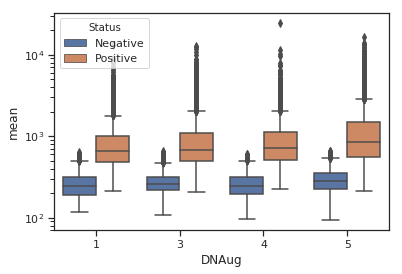

In [344]:
ax = sns.boxplot(x="DNAug",y="mean", hue='Status', data=df[df['Wavelength'] == 597])
ax.set_yscale('log')

In [345]:
df_pos = df[df['Status'] == 'Positive']
df_neg = df[df['Status'] == 'Negative']
percentages = {}
for ug in df_pos['DNAug'].unique():
    pos = df_pos[df_pos['DNAug'] == ug]
    neg = df_neg[df_neg['DNAug'] == ug]
    #print pos['Wavelength'].unique()
    count_neg = len(neg[neg['Wavelength'] == 597].index)
    count_pos = len(pos[pos['Wavelength'] == 597].index)
    total = float(count_neg+ count_pos)
    print 'negative',ug,count_neg 
    print 'positive',ug,count_pos
    print 'Percentage',ug, count_pos/total *100,'%'
    percentages[ug] = count_pos/total *100

#for wl in ['525', '597', '435']:
 #   bla = df_pos[df_pos['Wavelength'] == wl]
    
#print bla
#print bla.keys()

negative 1 3060
positive 1 2722
Percentage 1 47.0771359391 %
negative 3 3495
positive 3 3769
Percentage 3 51.8860132159 %
negative 4 2101
positive 4 1746
Percentage 4 45.3860150767 %
negative 5 2591
positive 5 4009
Percentage 5 60.7424242424 %


60.7424242424
['1', '3', '5', '4']
{}
1
3
4
5


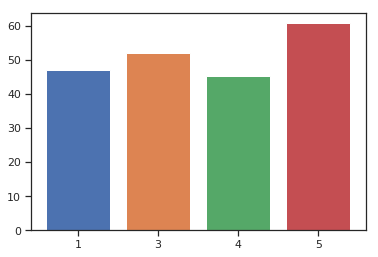

In [346]:
print percentages[a]
print percentages.keys()
print test

for a in ['1','3','4','5']:
    print a
    plt.bar(a,percentages[a])

1 897.295662291
2 616.185472121
3 1012.76880955
4 1008.806131
5 1377.85847037


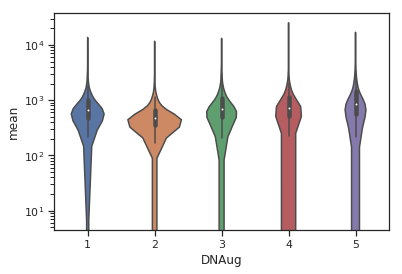

In [337]:
ax2 = sns.violinplot(x="DNAug",y="mean", data=red_pos)
ax2.set_yscale('log')
for ug in red_pos['DNAug'].unique():
    print ug, np.mean(red_pos[red_pos['DNAug'] == ug]['mean'])

In [32]:
%matplotlib qt4
#ax = sns.scatterplot(x="stdev",y="mean", data=df[df['Wavelength'] == 525])
#ax = sns.scatterplot(x="stdev",y="mean",hue="Wavelength", data=df[df['Wavelength'] != 600])
#ax = sns.stripplot(x="DNAug",y="mean", data=df[df['Wavelength'] == 525])
ax = sns.boxplot(x="DNAug",y="mean", data=df[df['Wavelength'] == 525])
#ax = sns.swarmplot(x="DNAug",y="mean", data=df[df['Wavelength'] == 525])
ax = sns.boxplot(x="DNAug",y="mean", data=df[df['Wavelength'] == 5597])
ax.set_yscale('log')
for i in df['DNAug'].unique():
    print i, np.mean(df[df['DNAug'] == i]['mean'])

1 1853.4055611
2 1061.23678648
3 2034.7995535
4 1832.58443548
5 2079.03020365
